# メニュー

## 概要

このレシピでは、『乗り物画像の分類』をテーマに、機械学習による画像分類タスクの開発を行います。

はじめに、オンラインで写真を共有しているコミュニティ [Flickr](https://www.flickr.com/) のAPIを使用して、機械学習モデルの学習データに使用する画像の収集を行います。

AI開発では、学習で使用するために必要なデータが足りない時が多々あります。そのような場合に、インターネット上に公開されている画像をクローリングして、必要なデータを準備します。また、クローリングによって収集した画像データをホールドアウト検証用に分割します。 ホールドアウト検証とは、データを学習用とテスト用に分割し、学習用のデータを使用してモデルを開発して、テスト用のデータでモデルをテストすることで、作られたモデルの妥当性を検証するための手法のことです。

次に、学習データを使って実際に 機械学習モデルを開発していきます。 今回のモデル開発には TensorFlow と Keras を使用します。

TensorFlow とは Google がオープンソースで開発している機械学習用のソフトウェアライブラリのことです。 Keras は、TensorFlow の上部で動作して、ユーザーが TensorFlow を使って Deep Learning を行うときに、より簡単にモデル開発をできるようにしたライブラリです。TensorFlow と Keras を用いてモデルを定義し、準備した学習データを TensorFlow が処理できる形式に変換して、モデルに学習データを与えることでモデルを作成します。

最後に、作成したモデルとテストデータを使って実際にモデルがどの程度適切に画像を分類できているか検証します。

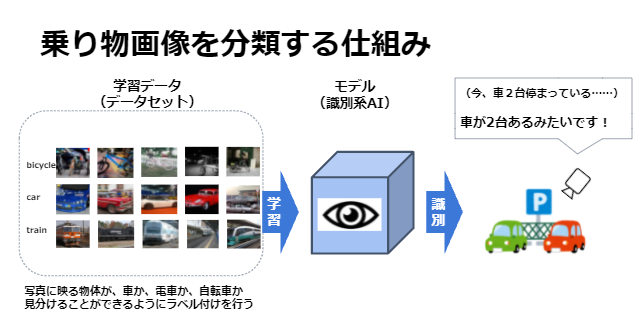

このレシピは、下記のような手順で開発を進めます。

1. Frickr APIの準備
2. Frickr APIを使用して学習データを準備する
3. データセットをホールドアウト検証用に分割する
4. モデルのトレーニング
5. モデルのテストと評価
6. まとめ

## 学べること

Python でWEBサイトをクローリングして外部から画像データを収集し、乗り物の画像分類モデル作成、モデル定義・評価まで、AIを活用した画像認識開発の一連の流れを学ぶことができます。

- Flickr APIを使って大量の画像データを集める
- 画像分類のAIモデルを作成する
- 集めた大量の画像データをAIモデルに与え、学習させる
- 学習させたAIモデルにテスト画像を与え、認識できるか確認/評価する

## 始める前のスキルセット

プログラミング初学者の方でもコーディングなしで、AI開発を学ぶことができます

## 実務活用例

このレシピの手法は以下のような実際の業務で活用しました。

- 中古車販売企業での車種分類作業
- アパレル EC 企業で衣服の写真を使用したアイテムの分類作業

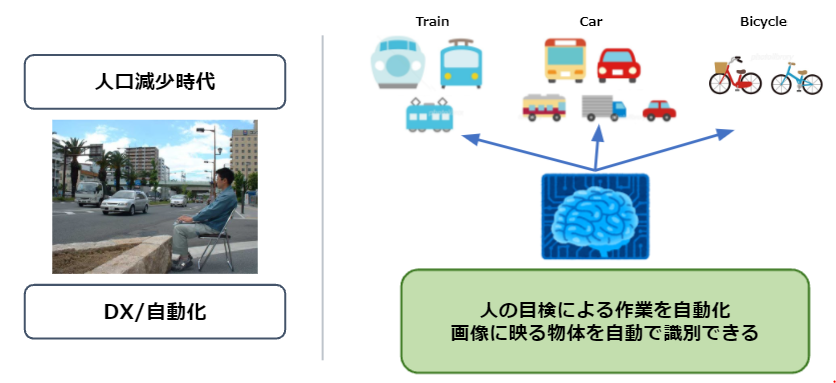

# キッチン

## 開発環境

- Google Colaboratory

## ツール

- Python3（実行環境: 3.7）
- OpenCV
  - OpenCV（正式名称： Open Source Computer Vision Library）は、オープンソースのコンピューター・ビジョン・ライブラリです。コンピューターで画像や動画を処理するのに必要な、さまざまな機能が実装されており、BSDライセンスで配布されていることから学術用途だけでなく商用目的でも利用できます。OpenCVは、Intelで開発され、その後、ロボティクス関連のハードウェア／ソフトウェアの開発を行っているWillow Garageに開発が引き継がれた後、現在はコンピュータービジョンの技術開発を手掛けるItseezによって開発が進められています。
- scikit-learn
  - scikit-learn（サイキット・ラーン）は、Pythonの機械学習ライブラリです。scikit-learnは、どのアルゴリズムでも同じような書き方で利用することができます。また、サンプルのデータセットが付属しているため、インストールしてすぐ機械学習を試すことができます。
- tqdm
  - tqdm は、走らせた処理の進捗状況をプログレスバーとして表示するためのパッケージです。
- Flickr
  - オンライン画像共有サイトです。
- TensorFlow
  - TensorFlow（テンソルフロー）は、 2015年にGoogleのディープラーニング研究プロジェクトが開発し、2017年にオープンソースとしてGithub上で公開された機械学習用のソフトウェアライブラリです。ライブラリとは、プログラムを組む際によく利用するコードなど、必要な部品をまとめたファイルのことです。TensorFlowは、多次元のデータ構造を、流れるように処理することができるニューラルネットワークを実装できます。
- Keras
  - Keras（ケラス）は、TensorFlowの裏で動かす、Pythonで書かれたオープンソースのニューラルネットワークフレームワークです。読みやすく簡潔なアーキテクチャで迅速に実装できることとユーザーフレンドリーで拡張性があることを重視して、Googleのエンジニアによって設計・開発されました。Kerasを用いると、ディープラーニングのベースとなっている数学的理論の部分をゼロから開発せずとも、比較的短いソースコードで実装することができます。ディープラーニング分野で画像やテキストデータをより容易に扱うためにTensorFlowのコアライブラリでサポートされています。

## データセット

オンラインで写真を共有しているコミュニティ [Flickr](https://www.flickr.com/) から写真をダウンロードします。
FlickrのAPI を使用して乗り物の画像データを収集します。

# 調理

## Flickr APIの準備

このレシピでは、 FlickrAPI を使用して、機械学習の学習用の乗り物画像データを収集します。APIとは、ソフトウェア同士をつなぐインターフェースのことです。

Flickr API を使用するためには、アカウントを登録し、Flickr APIの利用を申請する必要があります。下記の URL から Flickr のアカウント登録と API キーの発行をしましょう。

まずは [Flickr のサイト](https://www.flickr.com/)からアカウント登録を行なってください。

Flickr のアカウント作成が完了したら、API キーを発行していきましょう。以下の URL にアクセスをしてください。（事前にアカウント登録を行い、ログインをしておく必要があります。）

[Frickr APIキー発行](https://www.flickr.com/services/api/)

画面左上にある「Create an App」をクリックして、アプリを作成していきます。

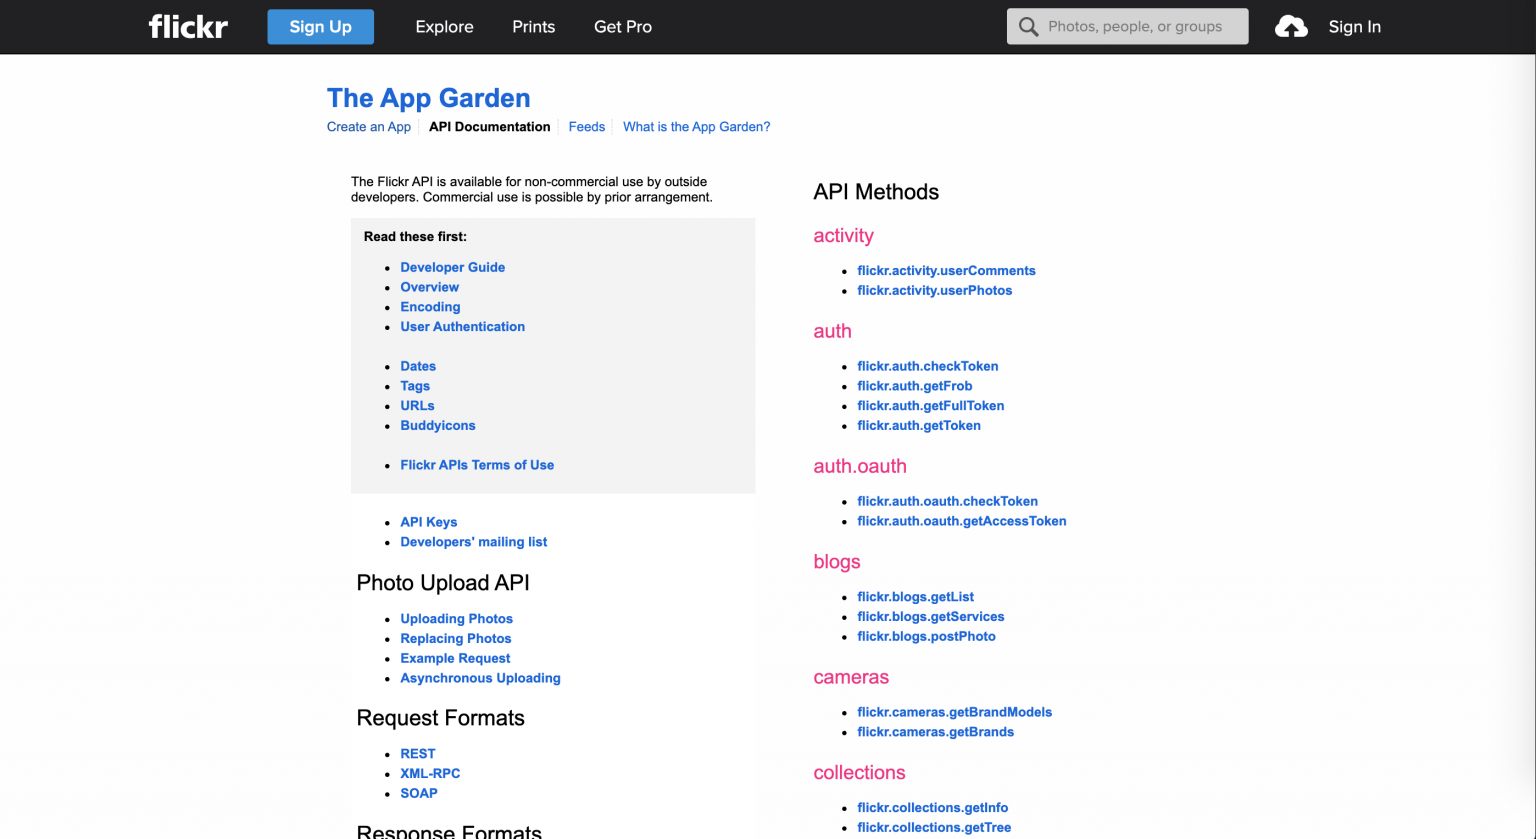

「Get your API Key」のセクションにある、「Request an API Key」をクリックして、API キーの発行をリクエストします。

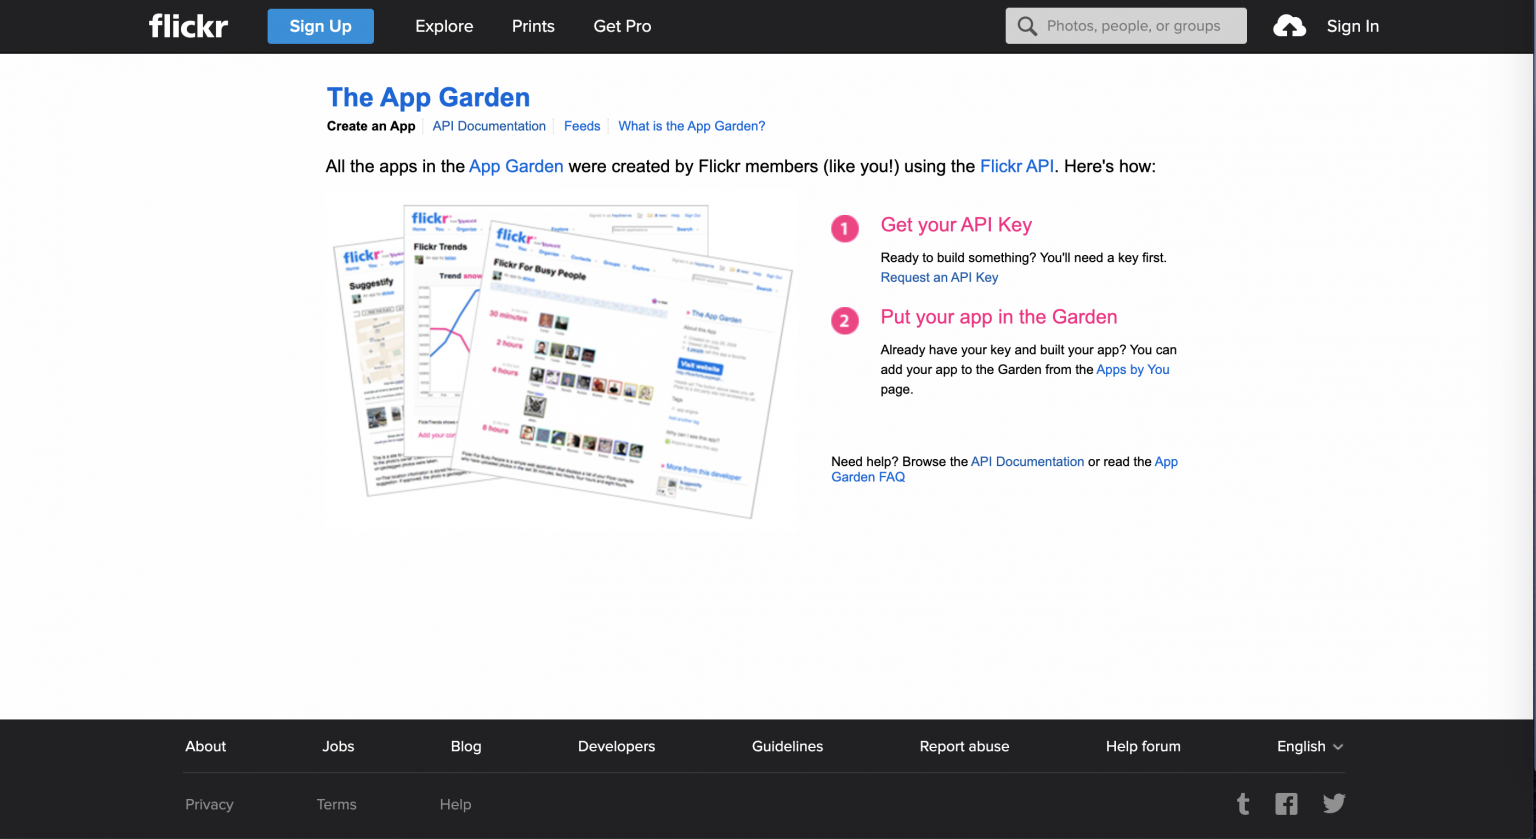

今回は商用目的ではないため、「APPLY FOR A NON_COMMERCIAL KEY」を選択します。

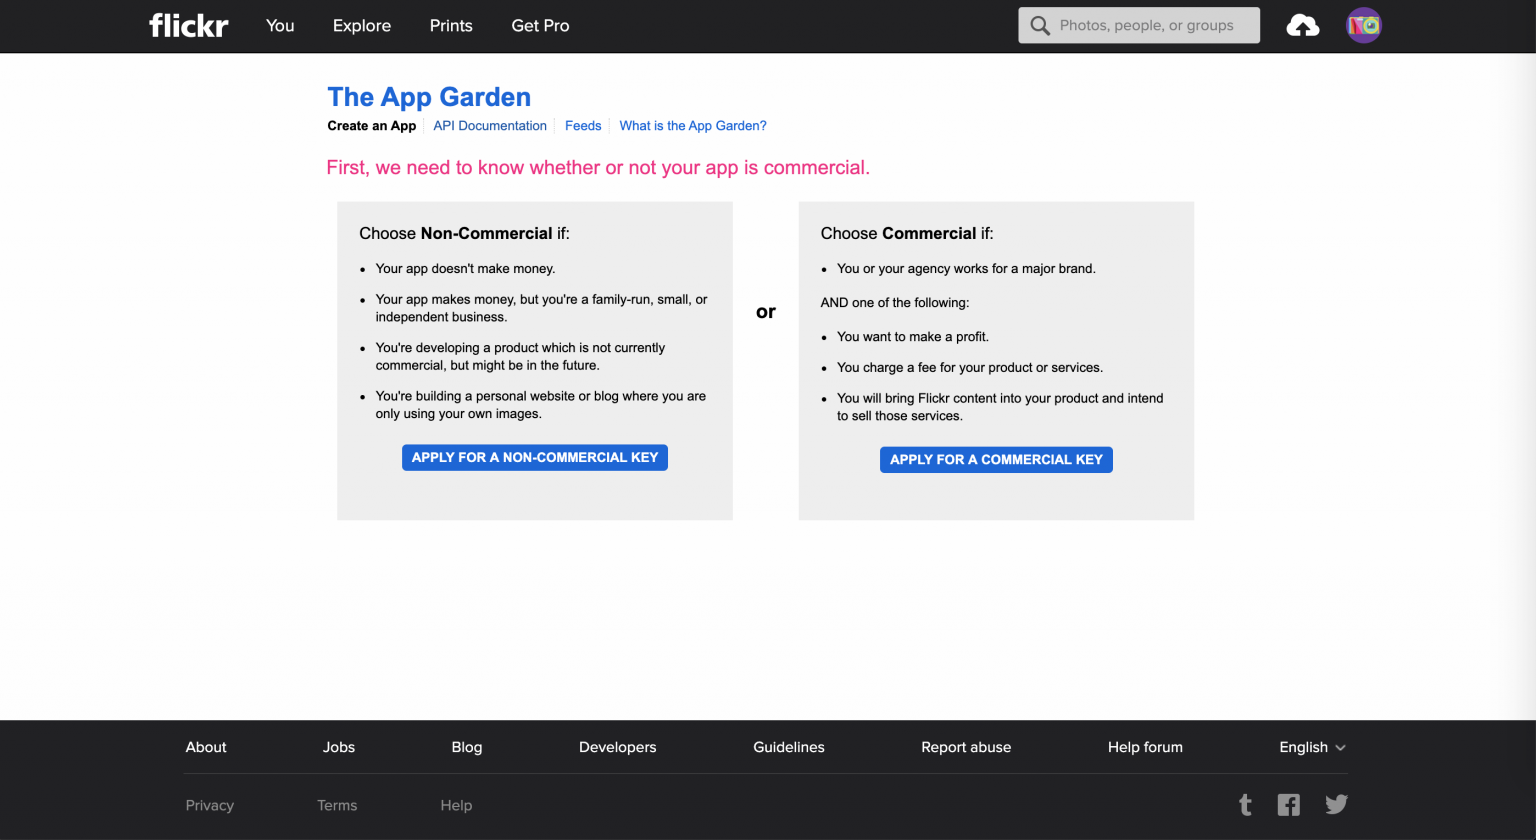

アプリの詳細を記載します。次の項目をそれぞれ以下のように入力します。

- What’s the name of your app? → vehicle image classification
- What are you building? → vehicle image classification with deep learning.

その後、利用規約等にチェックを入れて、「SUBMIT」をクリックします。

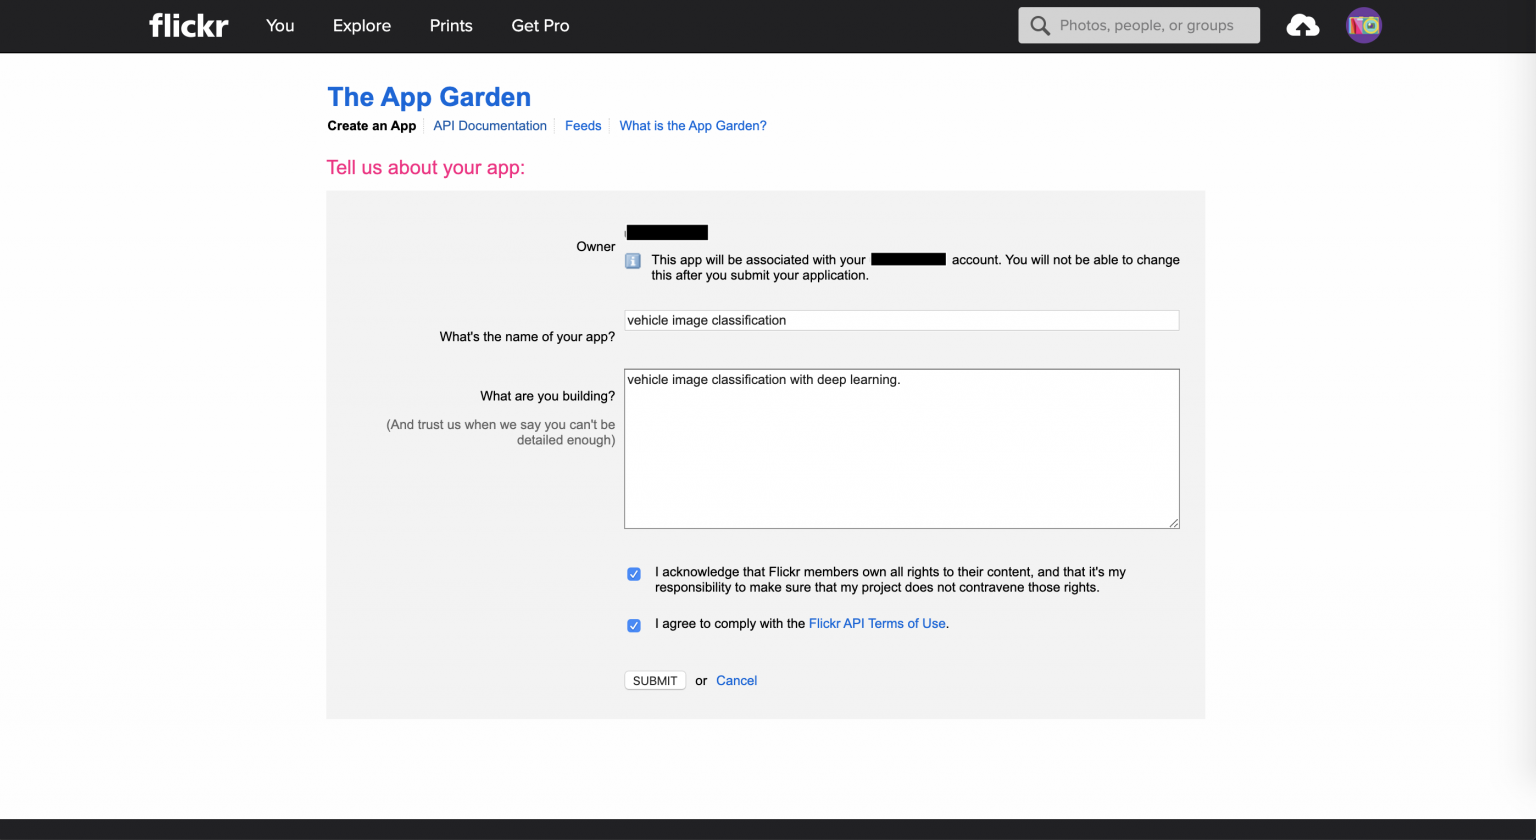

これでアプリの作成が完了しました。

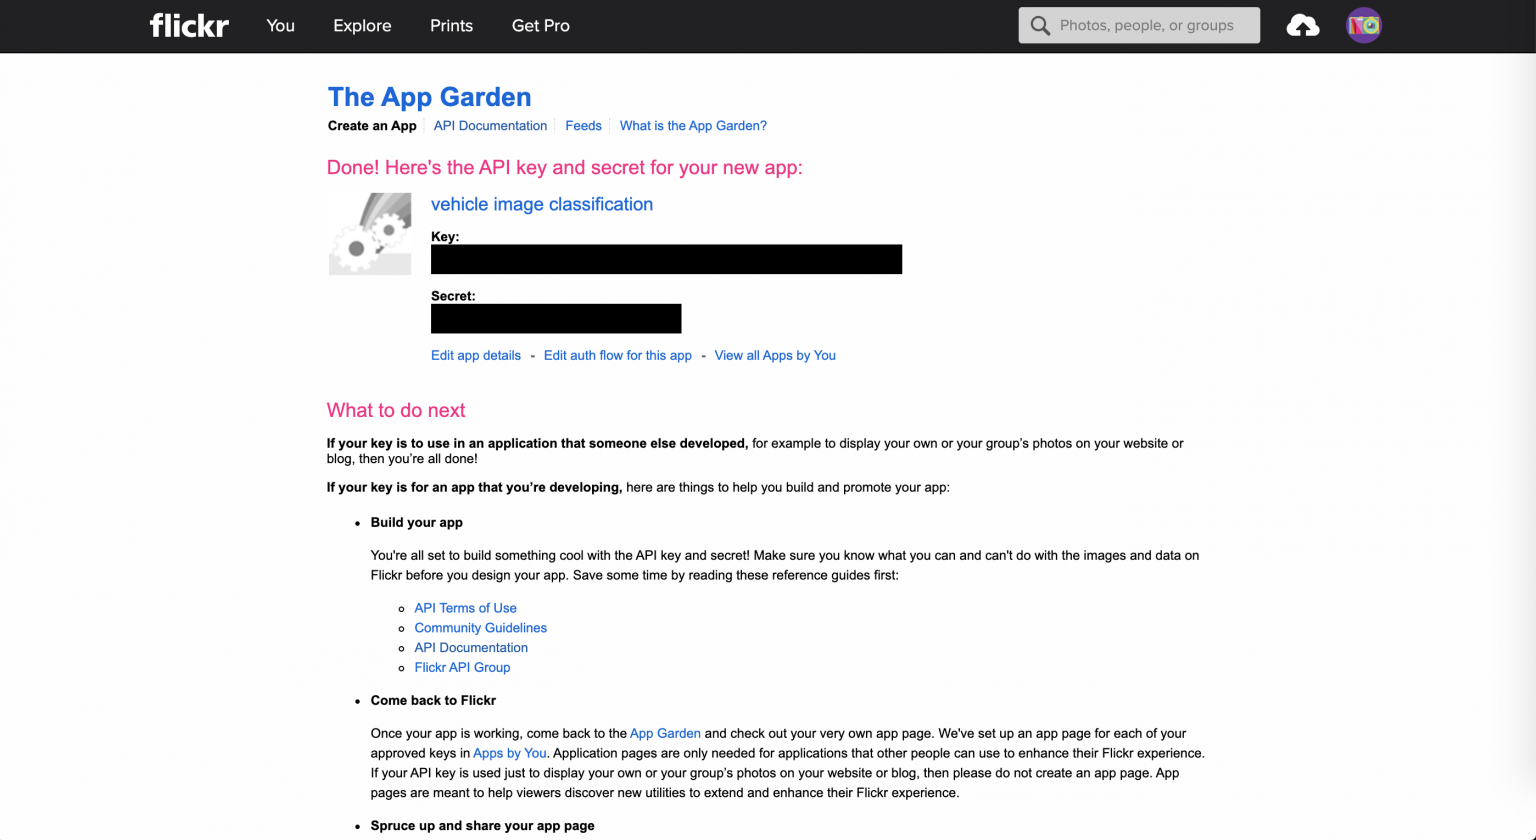

「Key」の箇所に皆さんのアプリの API キーとシークレットが発行されているので、こちらをメモしておきましょう。

## Flickr APIを使用して学習データを準備する

まず、Flickr API を使用して、乗り物の画像データを取得していきます。今回のレシピでは以下の３つの乗り物の画像をダウンロードしましょう。

- 電車（train）
- 車（car）
- 自転車（bicycle）

Google Colaboratory を開いてください。

次に Flickr API を使って画像を取得するために、flickrapi のライブラリを Google Colaboratory にインストールしていきます。インストールは pip と呼ばれる Python のパッケージマネージャーを使用して、ライブラリをインストールします。以下のコマンドを入力して実行してください。

まず、flickrapiライブラリをインストールします。

In [1]:
# Flickrライブラリのインストール
!pip install flickrapi

     |████████████████████████████████| 54 kB 1.7 MB/s 


ブラウザ上で flickrapi がインストールされたのが確認できる思います。

それでは次のコードを実行して、乗り物の画像をダウンロードしましょう。（全ての画像のダウンロードには少し時間がかかります。）

In [2]:
#  必要ライブラリのインポート
import os
import time
from urllib.request import urlretrieve
from flickrapi import FlickrAPI
from tqdm import tqdm

OSに依存した機能を使うための標準ライブラリos, 時間関連の情報や関数を集めた標準ライブラリtime, URLで表されるインターネット上のオブジェクトをローカルにコピーするための関数urlretrieve, Flickr APIを使うためのクラスFlickrAPI, 実行状況をプログレスバーで可視化する関数tqdm をインポートします。

APIキーとAPIシークレットを置き換えます。

In [3]:
#APIキー情報
FLICKR_KEY = "YOUR_FLICKR_KEY"
FLICKR_SECRET = "YOUR_FLICKR_SECRET"

APIキーとAPIシークレットを変数に入れておきます。実行する前に YOUR_FLICKR_KEY と YOUR_FLICKR_SECRET を、キッチンで取得した API キーとシークレットに置き換えてください。

各乗り物の画像を100件ずつ取得します。

In [4]:
# 乗り物の名前
VEHICLES = ["train", "car", "bicycle"]
# 各乗り物をループしてデータを取得
for vehicle in tqdm(VEHICLES):
    # 保存フォルダの指定
    save_dir = os.path.join("datasets", vehicle)
    os.makedirs(save_dir, exist_ok=True)
    # Flickr APIの初期化
    flickr = FlickrAPI(FLICKR_KEY, FLICKR_SECRET, format="parsed-json")
    # 乗り物の名前を指定して100件の画像情報を取得
    result = flickr.photos.search(
        text=vehicle,
        per_page=100,
        media="photos",
        sort="relevance",
        safe_search=1,
        extras="url_q, licence",
    )
    # 画像情報から実際の画像ファイルを取得
    photos = result["photos"]
    for photo in photos["photo"]:
        url_q = photo["url_q"]  # 画像のURL
        filepath = os.path.join(save_dir, photo["id"] + ".jpg")  # 画像のダウンロード先
        urlretrieve(url_q, filepath)  # 画像を指定したパスにダウンロードして保存
        time.sleep(1)  # クローリング先のサーバに負荷を与えないように1秒処理を止める

100%|██████████| 3/3 [05:21<00:00, 107.20s/it]


2行目で乗り物の名前を変数VEHICLESに入れておきます。
4行目以降で各乗り物をループしてデータを取得します。
6行目では保存フォルダを指定して作成します。関数os.path.joinの引数には保存フォルダまでのパスを階層ごとにカンマ区切りで指定します。
7行目の関数os.makedirsの第一引数には保存フォルダのパス、引数exist_okには既に存在するフォルダを指定してもエラーにならないようTrueを指定します。

9行目でFlickr APIを初期化します。クラスFlickrAPIの第一引数にはAPIキー、第二引数にはAPIシークレット、引数formatには戻り値の形式として”parsed-json”を指定します。

11行目のメソッドflickr.photos.searchにより画像を取得します。
12行目～17行目では、引数textに乗り物の名前、引数per_pageに画像の件数、引数mediaに画像のみ検索するよう"photos"、引数sortに並び順として"relevance"、引数safe_searchにセーフサーチで検索するため1、引数extrasに追加情報を指定します。

20行目のメソッドflickr.photos.searchの戻り値resultは辞書型で、キー"photos"のバリューを変数photosとします。
21行目の変数photosは辞書型で、キー"photo"のバリューはリスト型のため、photos["photo"]の要素に対してループで繰り返し処理を行います。
22行目～24行目において、変数photoは辞書型で、キー"url_q"のバリューである画像のURLを用いて画像のダウンロード先を指定して関数urlretrieveにより画像を指定パスにダウンロードします。関数urlretrieveの第一引数には画像のURL、第二引数には保存するファイルのパスを指定します。
画像をダウンロードしたらクローリング先のサーバに負荷を与えないように、
25行目のように1秒処理を止めます。

下記のようにプログレスバーが右端まで塗りつぶされて100%と表示されたら成功です。

```
100%|██████████| 3/3 [05:52<00:00, 117.36s/it]
```

ダウンロードが完了すると datasets フォルダ以下の各乗り物の画像が保存されていることが確認できると思います。

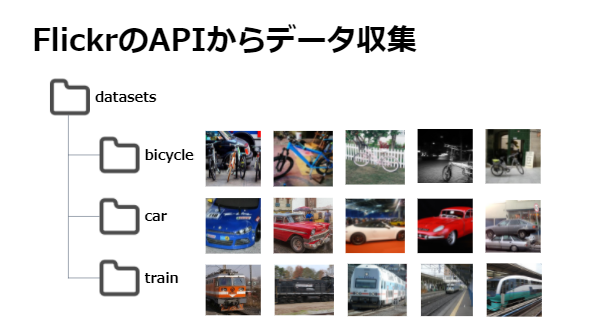

データセットの入手に時間がかかる場合、下記Googleドライブのリンクからも入手できます。

https://drive.google.com/file/d/1r7BDDzF3wQrA2JjzYbVQ7l-7A69IcEiu/view?usp=sharing

Googleドライブからのファイル取得をコードで実行する場合、次のコードになります。

In [23]:
!wget "https://drive.google.com/uc?export=download&id=1r7BDDzF3wQrA2JjzYbVQ7l-7A69IcEiu" -O datasets.zip
!unzip datasets.zip

--2022-02-15 00:17:19--  https://drive.google.com/uc?export=download&id=1r7BDDzF3wQrA2JjzYbVQ7l-7A69IcEiu
Resolving drive.google.com (drive.google.com)... 142.251.6.113, 142.251.6.101, 142.251.6.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vnsrpq8694gunt400h0frm0pehq6bh9l/1644884175000/11001150122605728410/*/1r7BDDzF3wQrA2JjzYbVQ7l-7A69IcEiu?e=download [following]
--2022-02-15 00:17:22--  https://doc-0g-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vnsrpq8694gunt400h0frm0pehq6bh9l/1644884175000/11001150122605728410/*/1r7BDDzF3wQrA2JjzYbVQ7l-7A69IcEiu?e=download
Resolving doc-0g-1o-docs.googleusercontent.com (doc-0g-1o-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Connecting to doc-0g-1o-docs.googleusercontent.com (doc-0g-1o

## データセットをホールドアウト検証用に分割する

先ほど取得した乗り物の画像データに対して、前処理を行います。画像の前処理として以下の処理を行います。

- 各乗り物のデータ数を100に揃える
- 画像を数値で扱うため、RGBの3色に変換する
- 画像のサイズを50×50に統一する
- 画像を数値の配列に変換する

In [5]:
# 必要ライブラリのインポート
import glob
import os

import numpy as np
from PIL import Image
from tqdm import tqdm

パターンに一致するパスを見つけ出すための標準ライブラリglob、標準ライブラリos, 数値計算を効率的に行うためのライブラリnumpy, 画像処理のためのモジュールImage, 関数tqdm をインポートします。

In [6]:
VEHICLES = ["train", "car", "bicycle"] # 乗り物の名前
DATASET_DIR = os.path.join("datasets") # データセットのフォルダパス

乗り物の名前を変数VEHICLESに入れておきます。データセットのフォルダパスを変数DATASET_DIRに指定します。

In [7]:
datasets = []
labels = []
for index, label in enumerate(tqdm(VEHICLES)):
    # 画像の読み込み
    photos_dir = os.path.join(DATASET_DIR, label)
    filepaths = glob.glob(os.path.join(photos_dir, "*.jpg"))

    # 画像を順次処理してデータセットを作成
    for i, filepath in enumerate(filepaths):
        # 各乗り物のデータ数を100に揃える
        if i >= 100:
            break

        image = Image.open(filepath)  # 画像の読み込み
        image = image.convert("RGB")  # RGBの３色に変換（画像を数値で扱うため）
        image = image.resize((50, 50))  # 画像のサイズを統一
        dataset = np.asarray(image)  # 画像を数値の配列に変換
        datasets.append(dataset)  # データセットを追加
        labels.append(index)  # ラベルを追加
print(len(datasets))
print(len(labels))

100%|██████████| 3/3 [00:00<00:00,  7.73it/s]

300
300


1行目～2行目でリスト型の変数datasetsとlabelsを初期化します。

3行目以降で各乗り物をループして前処理を行います。
5行目では各乗り物のフォルダパスを指定します。
6行目では関数glob.globにより引数に指定したパスに合致する全てのファイルのパスを文字列のリストで取得します。

8行目以降で各ファイルパスをループして画像を順次処理してデータセットを作成します。
9行目～12行目でif文により各乗り物のデータ数を100に揃えます。
14行目では関数Image.openにより画像を読み込み、15行目ではメソッドimage. convertにより画像を数値で扱うためにRGBの3色に変換、16行目ではメソッドimage. resizeにより画像のサイズを50×50に統一、17行目では関数np.asarrayにより画像を数値の配列に変換します。
17行目では前処理した画像を変数datasetsに追加します。
18行目ではラベルを変数labelsに追加します。

下記のようにプログレスバーが右端まで塗りつぶされて100%と表示され、データセットとラベルのサイズがそれぞれ300と表示されたら成功です。

```
100%|██████████| 3/3 [00:00<00:00,  7.60it/s]
300
300
```

次に前処理を行った画像データを、ホールドアウト法のために学習データとテストデータに分割します。 データの分割には、scikit-learn のライブラリを使用して、画像データとラベルデータをそれぞれ学習用とテスト用のデータに分割します。

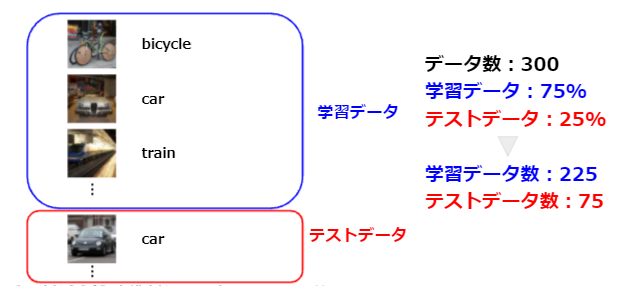

In [8]:
import numpy as np
from sklearn import model_selection

ライブラリnumpy, モデル選択のためのモジュールmodel_selectionをインポートします。

In [9]:
# TensorFlowがデータを処理しやすいようにnumpyのarrayに変換
datasets = np.array(datasets)
labels = np.array(labels)

# データセットとラベルの両方を学習データとテストデータに分割
dataset_train, dataset_test, label_train, label_test = model_selection.train_test_split(
    datasets, labels
)
print(dataset_train.shape)
print(dataset_test.shape)
print(label_train.shape)
print(label_test.shape)

(225, 50, 50, 3)
(75, 50, 50, 3)
(225,)
(75,)


2行目～3行目でTensorFlowがデータを処理しやすいように画像データとラベルデータをnumpyのarrayに変換します。
6行目～8行目で関数model_selection.train_test_splitにより引数に指定した画像データとラベルデータを学習データとテストデータに分割します。デフォルトでは学習データを0.75、テストデータを0.25の割合で分割します。テストデータの割合を変えるには引数test_sizeに0.0～1.0の値を指定します。
9行目～12行目で分割したデータの各次元のサイズを出力します。

下記のように表示されたら成功です。

```
(225, 50, 50, 3)
(75, 50, 50, 3)
(225,)
(75,)
```

そしてホールドアウト法のために分割した学習データとテストデータを保存します。

In [10]:
import numpy as np

ライブラリnumpyをインポートします。

In [11]:
# 分割したデータをファイルに保存
data = (dataset_train, dataset_test, label_train, label_test)
np.save(os.path.join(DATASET_DIR, "vehicle.npy"), data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


2行目で分割したデータをタプル型の1つの変数にまとめます。
3行目で関数np.saveにより第一引数に指定したファイルパスに第二引数に指定したデータを保存します。今回、第一引数に指定したvehicle.npyはNumPy独自のバイナリファイルです。

下記のようにフォルダdatasets下にvehicle.npyが作成されたら成功です。

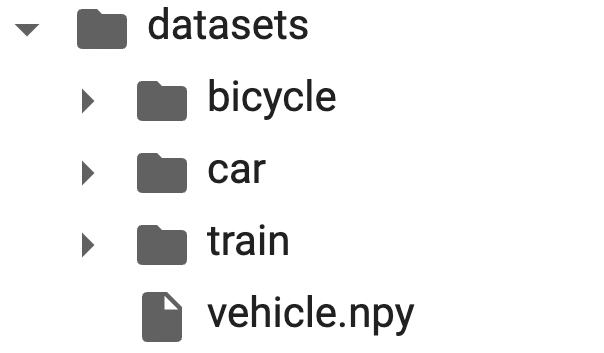

処理に時間がかかる場合、下記Googleドライブのリンクからも入手できます。

https://drive.google.com/file/d/1MxSJd1TsYDtUWAQXxOFgnh4qcRoZCcKr/view?usp=sharing

Googleドライブからのファイル取得をコードで実行する場合、次のコードになります。

In [24]:
!wget "https://drive.google.com/uc?export=download&id=1MxSJd1TsYDtUWAQXxOFgnh4qcRoZCcKr" -O vehicle.npy
!mv vehicle.npy datasets/vehicle.npy

--2022-02-15 00:17:39--  https://drive.google.com/uc?export=download&id=1MxSJd1TsYDtUWAQXxOFgnh4qcRoZCcKr
Resolving drive.google.com (drive.google.com)... 142.251.6.139, 142.251.6.113, 142.251.6.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v7lahta29k96qpvev653rghseaj76sqv/1644884250000/11001150122605728410/*/1MxSJd1TsYDtUWAQXxOFgnh4qcRoZCcKr?e=download [following]
--2022-02-15 00:17:40--  https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v7lahta29k96qpvev653rghseaj76sqv/1644884250000/11001150122605728410/*/1MxSJd1TsYDtUWAQXxOFgnh4qcRoZCcKr?e=download
Resolving doc-0c-1o-docs.googleusercontent.com (doc-0c-1o-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Connecting to doc-0c-1o-docs.googleusercontent.com (doc-0c-1o

## モデルのトレーニング

モデルのトレーニングのため、学習データとテストデータのそれぞれの画像を正規化します。

In [12]:
import os	
import numpy as np

ライブラリos、numpyをインポートします。

In [13]:
VEHICLES = ["train", "car", "bicycle"]  # 乗り物の名前
DATASET_DIR = os.path.join("datasets")  # データセットのフォルダパス

# データセットの読み込み
dataset_train, dataset_test, label_train, label_test = np.load(
    os.path.join(DATASET_DIR, "vehicle.npy"), allow_pickle=True
)

# 画素を0~1の範囲に変換（正規化）
dataset_train = dataset_train.astype("float") / 255
dataset_test = dataset_test.astype("float") / 255

print(dataset_train.max())
print(dataset_train.min())
print(dataset_test.max())
print(dataset_test.min())

1.0
0.0
1.0
0.0


1行目～2行目で乗り物の名前と保存フォルダを指定します。
5行目～7行目で関数np.loadにより第一引数に指定したファイルパスのファイルを読み込みます。第二引数のallow_pickleはデフォルトでTrueで、今回はTrueのまま関数を使用します。pickleを使用するといろんなコードが実行できてしまうので、セキュリティの観点からここをFalseにすることがあります。
10行目で訓練データの画像をそれぞれ正規化します。正規化では画像の各画素を0～1の範囲に変換します。
11行目で同様にテストデータの画像をそれぞれ正規化します。
13行目～16行目で訓練データとテストデータそれぞれの画像の最大値と最小値を出力します。

下記のように表示されたら成功です。場合によっては1が1に近い小数、0が0に近い小数と表示される可能性があります。

```
1.0
0.0
1.0
0.0
```

次にモデルのトレーニングのため、学習データとテストデータのそれぞれのラベルをOne-Hotエンコーディングします。

In [14]:
from keras.utils import np_utils

深層学習モデルを簡単な記述で構築できるライブラリKerasとNumPyの親和性を高めるモジュールnp_utilsをインポートします。

In [15]:
# ラベルをone-hotエンコーディング
label_train = np_utils.to_categorical(label_train, len(VEHICLES))
label_test = np_utils.to_categorical(label_test, len(VEHICLES))

print(label_train)
print(label_test)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0.

2行目で訓練データのラベルをOne-Hotエンコーディングします。One-Hotエンコーディングとは下記のようにカテゴリ変数を0または1で表現することです。

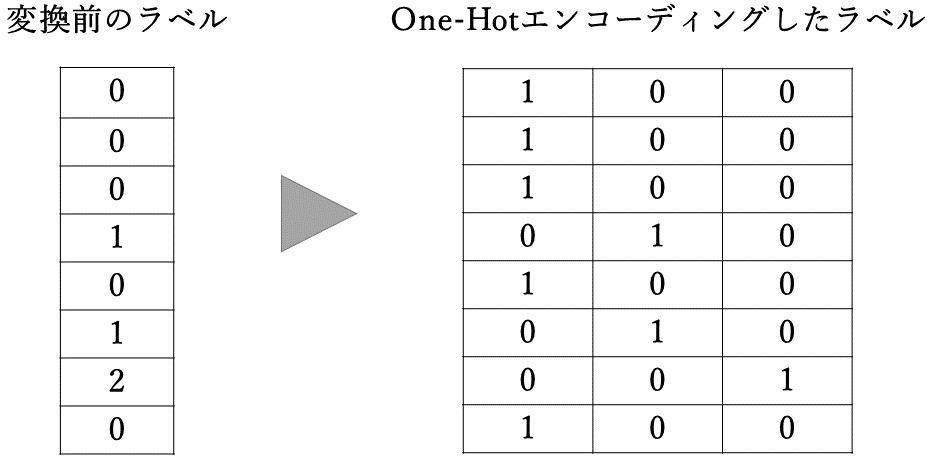

3行目で同様にテストデータのラベルをOne-Hotエンコーディングします。
5行目～6行目でOne-Hotエンコーディングした訓練データとテストデータそれぞれのラベルを出力します。

下記のように表示されたら成功です。

```
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
…（途中省略）
[0. 0. 1.]]
[[0. 0. 1.]
...（途中省略）
[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
```

それでは、先ほど準備した学習データを使用して、モデルをトレーニングするコードを書いていきましょう。トレーニングの処理の流れとしては、以下のようになっています。

1. データセットの読み込み
2. 画像データを正規化
3. ラベルデータを one-hot エンコーディング
4. モデルの定義
5. 最適化関数の選択
6. トレーニング
7. モデルの保存


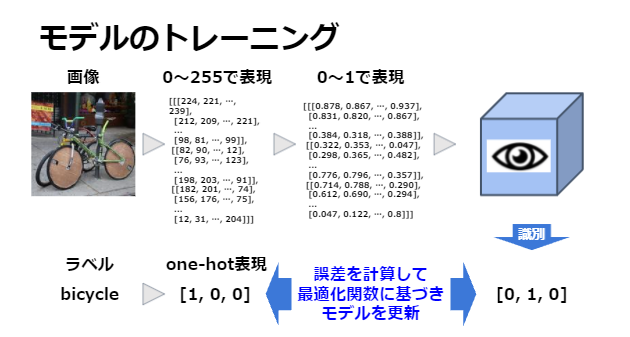

こちらのコードを実行してモデルを作成してみましょう。

In [16]:
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

深層学習モデルの構築に使用する活性化関数モジュールActivation、畳み込み層モジュールConv2D、全結合層モジュールDense、ドロップアウトモジュールDropout、平坦化モジュールFlatten、マックスプーリングモジュールMaxPooling2D、系列モデルのモジュールSequential、RMSPropオプティマイザのモジュールRMSpropをインポートします。

In [17]:
# モデルの定義
# 今回はKerasを用いた画像分類のサンプルコードを利用
# https://github.com/aidiary/keras-examples/blob/master/cnn/cifar10/cifar10.py
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=dataset_train.shape[1:]))

model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(3))
model.add(Activation("softmax"))

CNNモデルを構築します。今回はKerasを用いた画像分類のサンプルコードを利用します。
4行目でクラスSequentialによりKerasの系列モデルのインスタンスを作成します。
5行目でメソッドaddの引数に指定した層を系列モデルに追加します。追加した順に入力から近い層になります。クラスConv2Dは畳み込み層で、第一引数に畳み込み層の出力の次元数、第二引数に畳み込みウィンドウの長さ、引数paddingにパディングの方法、引数input_shapeに入力データの各次元のサイズを指定します。引数input_shapeはモデルの第一層にのみ指定します。
7行目のクラスActivationは活性化関数で、引数に活性化関数名を指定します。引数の”relu”はReLU関数を意味します。
8行目～9行目でモデルに畳み込み層、活性化関数ReLUを追加します。
10行目のクラスMaxPooling2Dはマックスプーリング層で、引数pool_sizeにダウンスケールする係数を(垂直方向, 水平方向)の形式で指定します。
11行目のクラスDropoutはドロップアウト層で、第一引数にドロップする割合を指定します。
13行目～18行目でモデルに畳み込み層、活性化関数ReLU、畳み込み層、活性化関数ReLU、マックスプーリング層、ドロップアウト層を追加します。
20行目のクラスFlattenは平坦化で、1次元配列に変換します。
21行目のクラスDenseは全結合層で、引数に出力の次元数を指定します。
22行目～24行目でモデルに活性化関数ReLU、ドロップアウト層、全結合層を追加します。
25行目でクラスActivationにより引数に"softmax"と指定して活性化関数Softmaxを追加します。

In [18]:
opt = RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1行目でクラスRMSpropによりRMSPropオプティマイザを定義します。引数lr に学習率、引数decay に学習率の減衰率を指定します。
2行目でメソッドcompileにより引数lossに誤差関数、引数optimizerにオプティマイザ、引数metricsに評価指標を指定します。
3行目でメソッドsummaryにより構築したモデルの要約を出力します。

下記のように表示されたら成功です。

```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 activation_2 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 22, 22, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 512)               3965440   
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
=================================================================
Total params: 4,032,547
Trainable params: 4,032,547
Non-trainable params: 0
```

構築したCNNモデルを訓練データによりトレーニングします。その後、テストデータによりトレーニングしたモデルを評価します。

In [19]:
# モデルのトレーニング
model.fit(dataset_train, label_train, batch_size=32, epochs=100)

# モデルの保存
model.save(os.path.join(DATASET_DIR, "vehicle_cnn.h5"))

Epoch 1/100
8/8 [==============================] - 12s 62ms/step - loss: 1.1020 - accuracy: 0.3733
Epoch 2/100
8/8 [==============================] - 0s 28ms/step - loss: 1.0254 - accuracy: 0.4622
Epoch 3/100
8/8 [==============================] - 0s 31ms/step - loss: 0.9643 - accuracy: 0.5111
Epoch 4/100
8/8 [==============================] - 0s 32ms/step - loss: 0.9436 - accuracy: 0.5778
Epoch 5/100
8/8 [==============================] - 0s 29ms/step - loss: 0.8933 - accuracy: 0.6089
Epoch 6/100
8/8 [==============================] - 0s 31ms/step - loss: 0.9193 - accuracy: 0.5822
Epoch 7/100
8/8 [==============================] - 0s 25ms/step - loss: 0.8340 - accuracy: 0.6267
Epoch 8/100
8/8 [==============================] - 0s 26ms/step - loss: 0.8441 - accuracy: 0.6000
Epoch 9/100
8/8 [==============================] - 0s 31ms/step - loss: 0.8348 - accuracy: 0.6311
Epoch 10/100
8/8 [==============================] - 0s 28ms/step - loss: 0.8252 - accuracy: 0.6489
Epoch 11/100
8/8 [

2行目でメソッドfitにより構築したモデルをトレーニングします。第一引数に訓練用の画像データ、第二引数に訓練用のラベルデータ、引数batch_size にバッチサイズ、引数epochsにエポックを指定します。
5行目でメソッドsaveによりトレーニングしたモデルを保存します。引数にモデルを保存するファイルパスを指定します。h5は大量のデータを格納するのに適したファイルフォーマットです。

トレーニングが完了すると、datasets フォルダー以下に vehicle_cnn.h5 のファイルにモデルが保存されていることが確認できます。

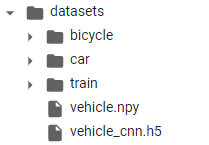

また学習時のログを確認してみると、Epoch が 100 に近くにつれて精度が上がっていて、ほぼ 100%近い精度になっているようです。実際にこのモデルが学習していないデータでどのぐらいの精度になるのか次のセクションで確認してみましょう。

```
Epoch 95/100
225/225 [==============================] - 3s 13ms/step - loss: 0.1412 - acc: 0.9511
Epoch 96/100
225/225 [==============================] - 3s 13ms/step - loss: 0.0606 - acc: 0.9867
Epoch 97/100
225/225 [==============================] - 3s 13ms/step - loss: 0.0510 - acc: 0.9956
Epoch 98/100
225/225 [==============================] - 3s 13ms/step - loss: 0.0767 - acc: 0.9689
Epoch 99/100
225/225 [==============================] - 3s 13ms/step - loss: 0.0909 - acc: 0.9778
Epoch 100/100
225/225 [==============================] - 3s 13ms/step - loss: 0.0638 - acc: 0.9778
```

## モデルのテストと評価

最後に、先ほど作成したモデルを使って、モデルの精度を検証します。モデルのテストには、テスト用に準備した画像データとラベルデータを使用します。

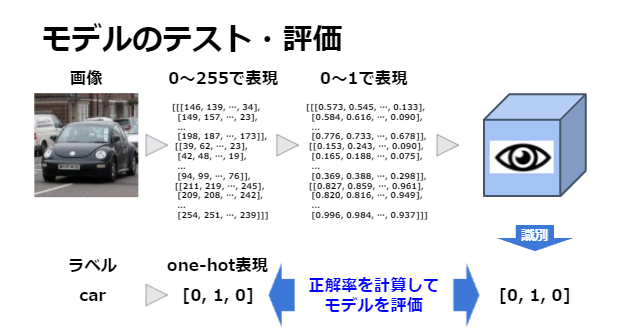

こちらのコードを実行して、結果を確認してみましょう。

In [20]:
import os

import keras
import numpy as np
from keras.utils import np_utils

ライブラリos、keras、numpy、モジュールnp_utilsをインポートします。

In [21]:
VEHICLES = ["train", "car", "bicycle"]  # 乗り物の名前
DATASET_DIR = os.path.join("datasets")  # データセットのフォルダパス

# データセットの読み込み
dataset_train, dataset_test, label_train, label_test = np.load(
    os.path.join(DATASET_DIR, "vehicle.npy"), allow_pickle=True
)

# 画素を0~1の範囲に変換（正規化）
dataset_test = dataset_test.astype("float") / 255

# ラベルをone-hotエンコーディング
label_test = np_utils.to_categorical(label_test, len(VEHICLES))

# モデルの読み込み
model = keras.models.load_model(os.path.join(DATASET_DIR, "vehicle_cnn.h5"))
scores = model.evaluate(dataset_test, label_test, verbose=1)

print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

3/3 [==============================] - 0s 50ms/step - loss: 1.1737 - accuracy: 0.6933
Loss: 1.1736501455307007
Accuracy: 0.6933333277702332


1行目～2行目で乗り物の名前と保存フォルダを指定します。
5行目～7行目で訓練データとテストデータを読み込みます。
10行目でメソッドcompileにより引数lossに誤差関数、引数optimizerにオプティマイザ、引数metricsに評価指標を指定します。
13行目でテストデータのラベルをOne-Hotエンコーディングします。
16行目で関数keras.models.load_modelにより引数に指定するファイルパスのモデルを読み込みます。
17行目でメソッドevaluateによりモデルを評価します。第一引数にテスト用の画像データ、第二引数にテスト用のラベルデータ、引数verboseにログの表示を指定します。引数verboseに0を指定するとログを出力せず、1を指定するとログを出力します。
19行目～20行目で損失と正解率を出力します。

今回の筆者が作ったモデルの精度は約70%という結果になりました。モデルとしてはまだ改善の余地が残っているようですが、最初はこれくらいの精度から始まります。

```
Loss: 1.1736501455307007
Accuracy: 0.6933333277702332
```

この精度のモデルだと各画像に対してどのように予測するのか見てみましょう。5枚の画像について正解と予測とともに出力します。

In [22]:
import matplotlib.pyplot as plt

Pythonによる可視化を行うモジュールmatplotlib.pyplotをインポートします。

【画像0】


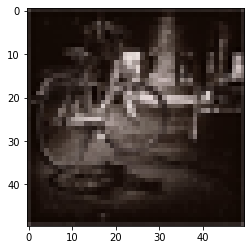

正解：[0. 0. 1.]
予測：[0.01444294 0.9159819  0.06957521]

【画像1】


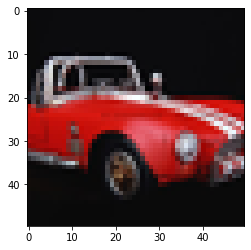

正解：[0. 1. 0.]
予測：[2.514247e-05 9.999740e-01 7.802813e-07]

【画像2】


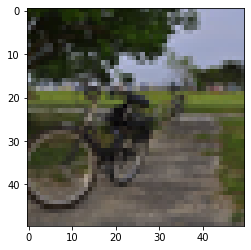

正解：[0. 0. 1.]
予測：[0.08168872 0.05220738 0.86610395]

【画像3】


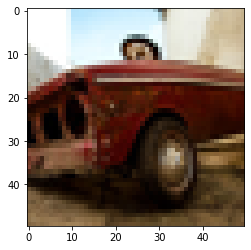

正解：[0. 1. 0.]
予測：[9.9961346e-01 3.2530114e-04 6.1272731e-05]

【画像4】


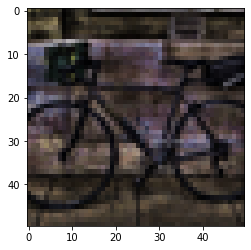

正解：[0. 0. 1.]
予測：[0.02933094 0.15121807 0.819451  ]



In [23]:
for i in range(5):
    print(f'【画像{i}】')
    fig = plt.figure()
    plt.imshow(dataset_test[i])
    plt.show()

    print(f'正解：{label_test[i]}')

    print(f'予測：{model.predict(dataset_test, verbose=0)[i]}\n')

正解、予測、ともに左から順に「電車」「車」「自転車」を示しています。正解のうち1となっているものが正解ラベル、予測のうち最も大きい値が予測ラベルです。暫定の精度だと人が見てもこの乗り物だなと確信を持って分類できるものについては、モデルも正しく分類できていることがわかります。一方、少しわかりにくいものについては、モデルも分類を誤っていることがわかります。

## まとめ

さて皆さんが作成したモデルはまだ精度改善の余地がありそうです。
一般的にモデルの精度を向上させるには、次のような手法があります。

1. データ量を増やす
2. ハイパーパラメーター・アルゴリズムの調整
3. モデルの修正（層やセルの数）

今回のケースではそれぞれの乗り物で 100 件のデータしか使用していませんでした。通常 Deep Learning ではもっと多くのデータをモデルに与えて学習させます。そのため、データ数を増やすことが一番効率よく精度をあげることができそうです。

実際にデータ数を 100 件から 200 件に変更したときに精度が変わるか、ぜひ皆さん自身で確認してみましょう。